<div style="
  background: linear-gradient(90deg, #222e42ff, #d8aee4ff);
  padding: 16px;
  border-radius: 8px;
  color: #ffffff;
  font-family: Arial, sans-serif;
">

  <h2 style="margin: 0 0 8px 0;">
    Pract – 3: Implementation of Federated Learning using Pytorch Lib
  </h2>

  <p style="margin: 0; font-size: 14px; line-height: 1.5;">
    • Generate a synthetic dataset for Linear Regression<br/>
    • Create 3 clients and train local models<br/>
    • Client 1 data: 1, 2, 3, 4, …<br/>
    • Client 2 data: 2, 4, 6, 8, …<br/>
    • Client 3 data: 3, 6, 9, 12, …<br/>
    • Aggregate weights/gradients to form a global model<br/>
    • Send updated global model back to clients
  </p>

</div>


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Generate Synthetic Data

In [2]:
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y_client1 = 1 * X
y_client2 = 2 * X
y_client3 = 3 * X

## Step 2: Define Linear Regression Model

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

## Step 3: Local Training Function

In [4]:
def train_client(model, X, y, lr=0.01, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for _ in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

    return model

## Step 4: Train Local Models

In [5]:
client1 = LinearRegressionModel()
client2 = LinearRegressionModel()
client3 = LinearRegressionModel()

train_client(client1, X, y_client1)
train_client(client2, X, y_client2)
train_client(client3, X, y_client3)

print('Client 1:', list(client1.parameters()))
print('Client 2:', list(client2.parameters()))
print('Client 3:', list(client3.parameters()))

Client 1: [Parameter containing:
tensor([[1.1208]], requires_grad=True), Parameter containing:
tensor([-0.4361], requires_grad=True)]
Client 2: [Parameter containing:
tensor([[1.9511]], requires_grad=True), Parameter containing:
tensor([0.1765], requires_grad=True)]
Client 3: [Parameter containing:
tensor([[2.8707]], requires_grad=True), Parameter containing:
tensor([0.4667], requires_grad=True)]


## Step 5: Federated Averaging (FedAvg)

In [6]:
global_model = LinearRegressionModel()

with torch.no_grad():
    for gp, p1, p2, p3 in zip(
        global_model.parameters(),
        client1.parameters(),
        client2.parameters(),
        client3.parameters()
    ):
        gp.copy_((p1 + p2 + p3) / 3)

## Step 6: Distribute Global Model

In [7]:
client1.load_state_dict(global_model.state_dict())
client2.load_state_dict(global_model.state_dict())
client3.load_state_dict(global_model.state_dict())

<All keys matched successfully>

## Step 7: Visualization

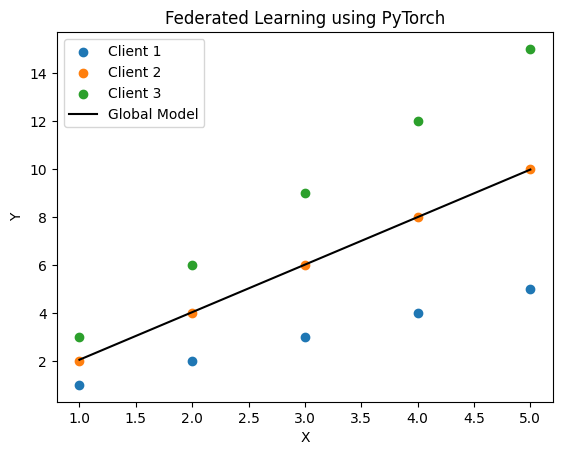

In [8]:
with torch.no_grad():
    y_pred = global_model(X)

plt.scatter(X.numpy(), y_client1.numpy(), label='Client 1')
plt.scatter(X.numpy(), y_client2.numpy(), label='Client 2')
plt.scatter(X.numpy(), y_client3.numpy(), label='Client 3')
plt.plot(X.numpy(), y_pred.numpy(), color='black', label='Global Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Federated Learning using PyTorch')
plt.show()

## Conclusion
- Local PyTorch models were trained on each client
- Data privacy was preserved
- Parameters were aggregated using FedAvg
- A global model was formed and redistributed